In [151]:
#Загрузка датасета
data=pd.read_csv("winequality.csv", delimiter=',', encoding='UTF-8')
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


In [152]:
X = data.drop(columns=['good', 'color'], axis = 1)
y = data['color']

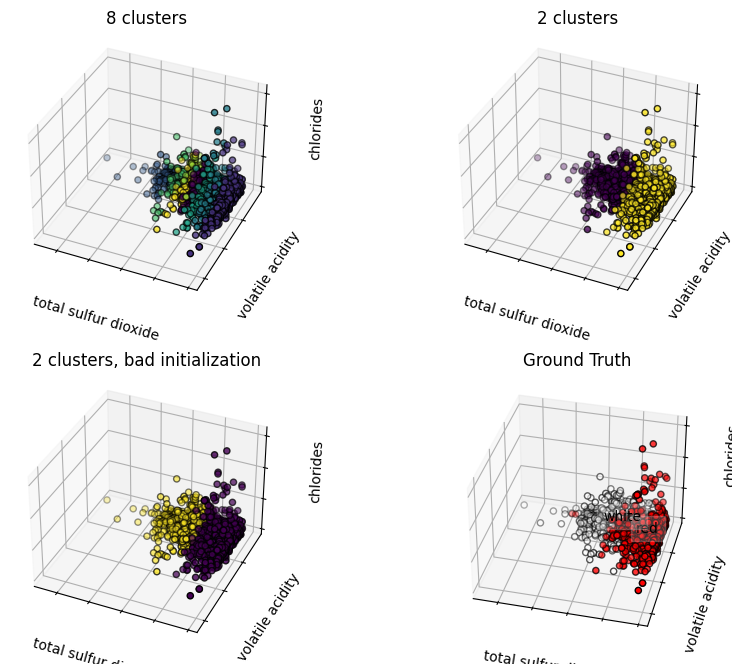

In [155]:
vals = data["color"].unique()
# Определение различных оценивателей алгоритма KMeans с разными параметрами кластеризации
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),  # KMeans с 8 кластерами
    ("k_means_2", KMeans(n_clusters=2)),  # KMeans с 2 кластерами
    ("k_means_bad_init", KMeans(n_clusters=2, n_init=1, init="random")),  # KMeans с 2 кластерами и плохой инициализацией
]

# Создание фигуры для визуализации
fig = plt.figure(figsize=(10, 8))
# Названия для кластеров
titles = ["8 clusters", "2 clusters", "2 clusters, bad initialization"]

# Цикл по оценивателям и названиям
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    # Создание 3D подграфика
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=35, azim=114)
    est.fit(X)  # Обучение модели на данных
    labels = est.labels_  # Получение меток кластеров

    # Визуализация результатов кластеризации
    ax.scatter(X["total sulfur dioxide"], X["volatile acidity"], X["chlorides"], c=labels.astype(float), edgecolor="k")

    # Отключение меток осей для чистоты визуализации
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("total sulfur dioxide")  # Подпись оси X
    ax.set_ylabel("volatile acidity")  # Подпись оси Y
    ax.set_zlabel("chlorides")  # Подпись оси Z
    ax.set_title(title)  # Заголовок для текущего подграфика

# Визуализация истинных меток классов
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=35, azim=104)

# Цикл для отображения истинных классов
for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = data[data["color"]==name]  # Выбор поднабора данных по классу
    ax.text3D(
        ds["total sulfur dioxide"].mean(),  # Среднее значение для оси X
        ds["volatile acidity"].mean(),   # Среднее значение для оси Y
        ds["chlorides"].mean(),  # Среднее значение для оси Z
        name,                        # Название класса
        horizontalalignment="center",  # Выравнивание текста по центру
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),  # Коробка вокруг текста
    )

# Визуализация данных с истинными метками классов
ax.scatter(X["total sulfur dioxide"], X["volatile acidity"], X["chlorides"], c=y, edgecolor="k")

# Отключение меток осей для четкости визуализации
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("total sulfur dioxide")   # Подпись оси X
ax.set_ylabel("volatile acidity")   # Подпись оси Y
ax.set_zlabel("chlorides")    # Подпись оси Z
ax.set_title("Ground Truth")      # Заголовок для подграфика с истинными метками

# Настройка интервалов между подграфиками
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()  # Отображение всех графиков

In [156]:

# Определяем диапазон количества кластеров от 2 до 20
n_clusters = np.arange(2, 21)

# Инициализируем список для хранения наилучшей метрики и соответствующих значений
best_metric = [0, 10000, 0, []]

# Списки для хранения значений силуэтного коэффициента и скорректированного индекса Рандалла
silhouette_score_values = []
adjusted_rand_score_values = []

# Цикл по каждому значению количества кластеров
for n in n_clusters:
    # Создаем кластеризатор KMeans с заданным количеством кластеров
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)

    # Обучаем кластеризатор на данных X
    clusterer.fit(X)

    # Прогнозируем метки кластеров для данных X
    y_pred = clusterer.predict(X)

    # Вычисляем силуэтный коэффициент для текущего решения
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Вычисляем скорректированный индекс Рандалла для оценки качества кластеризации
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)

    # Проверяем, является ли текущее значение лучшим по обоим критериям
    if score1 < best_metric[1] and score2 > best_metric[2]:
        # Если да, обновляем наилучшие метрики
        best_metric[1] = score1  # Сохраняем само значение силуэтного коэффициента
        best_metric[2] = score2  # Сохраняем скорректированный индекс Рандалла
        best_metric[3] = clusterer.cluster_centers_  # Сохраняем центры кластеров
        best_metric[0] = n  # Сохраняем текущее количество кластеров

best_metric

[2,
 0.5091835220675637,
 0.3232265505042162,
 array([[6.90508451e+00, 2.87048800e-01, 3.39787350e-01, 7.26278626e+00,
         4.85997819e-02, 3.98373773e+01, 1.55951063e+02, 9.94797606e-01,
         3.19015540e+00, 5.00019084e-01, 1.02574282e+01, 5.82497274e+00],
        [7.61753270e+00, 4.07887946e-01, 2.91205373e-01, 3.08405797e+00,
         6.56726759e-02, 1.84515730e+01, 6.36139979e+01, 9.94565716e-01,
         3.25525274e+00, 5.71785083e-01, 1.07956816e+01, 5.80982679e+00]])]

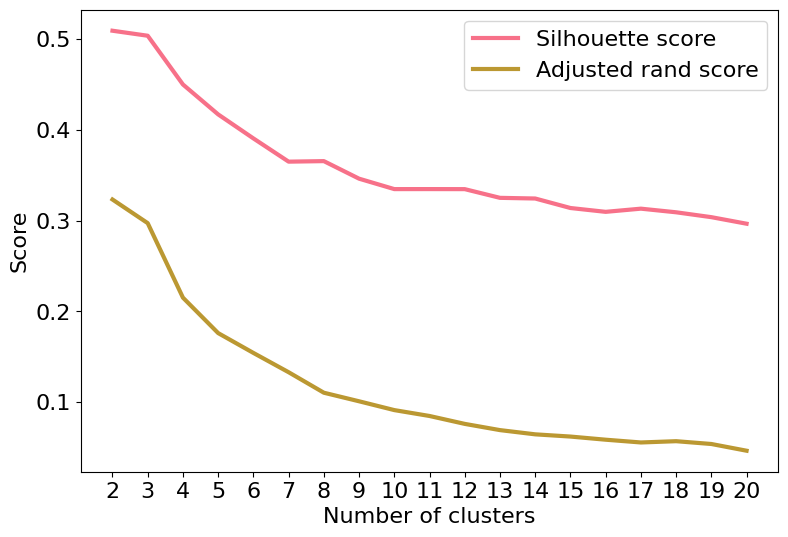

In [157]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

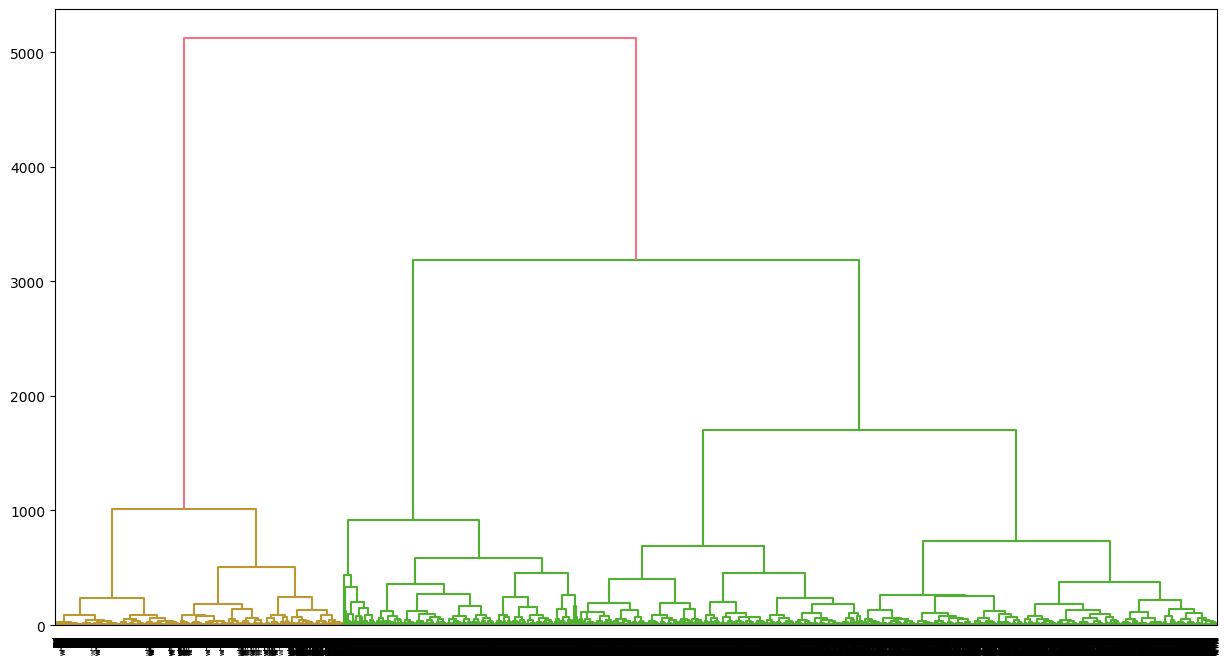

In [158]:
samples = X.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

['y', 'b', 'g', 'r']


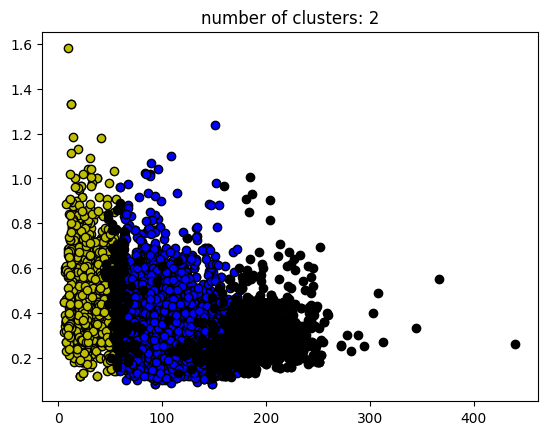

In [159]:
# Определяем количество признаков в наборе данных X
mins = X.shape[1]  # X - это матрица признаков, где shape[1] возвращает количество признаков

# Создаем объект DBSCAN с параметрами eps=0.5 и min_samples=12 и применяем к данным X
db = DBSCAN(eps=15.0, min_samples=500).fit(X)

'''
min_samples: Этот параметр указывает количество точек, необходимых для формирования кластера.
Если точка имеет достаточное количество соседей в пределах радиуса eps, она считается основной (core point).
'''
# Создаем маску для основных точек кластеров
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # Инициализируем маску для основных точек
core_samples_mask[db.core_sample_indices_] = True  # Устанавливаем True для основных точек
labels = db.labels_  # Получаем метки кластеров для каждой точки

# Подсчитываем количество кластеров, игнорируя шум (метка -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Начинаем построение графика

# Уникальные метки кластеров
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']  # Определяем список цветов для отображения кластеров
print(colors)  # Выводим цвета в консоль

# Проходим по уникальным меткам кластеров и рисуем их
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Черный цвет используется для обозначения шума
    col = 'k'

  # Создаем маску для членов класса
  class_member_mask = (labels == k)

  # Выбираем точки кластеров, которые являются основными
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy["total sulfur dioxide"], xy["volatile acidity"], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=6)  # Рисуем основные точки

  # Выбираем точки не являющиеся основными
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy["total sulfur dioxide"], xy["volatile acidity"], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=6)  # Рисуем остальные точки

# Устанавливаем заголовок графика с количеством кластеров
plt.title('number of clusters: %d' % n_clusters_)
plt.show()  # Отображаем график

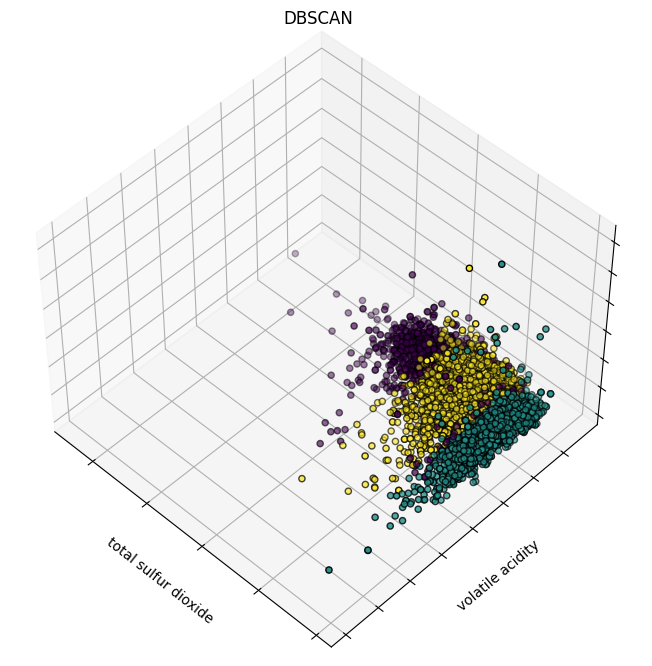

In [160]:
# Создаем фигуру для графика с заданным размером
fig = plt.figure(figsize=(10, 8))

# Добавляем подграфик с 3D проекцией
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
# `1, 1, 1` означает, что мы создаем одну единственную панель на графике
# `projection="3d"` указывает на то, что это трехмерный график
# `elev` и `azim` определяют углы наклона и поворота графика

# Создаем 3D рассеянный график, используя заданные оси X, Y и Z
ax.scatter(X["total sulfur dioxide"], X["volatile acidity"], X["chlorides"],
           c=labels.astype(float), edgecolor="k")
# X["sulphates"], X["density"], X["alcohol"] - это три измерения, по которым мы визуализируем точки
# `c=labels.astype(float)` - придает цвет точкам в графике в зависимости от меток кластеров, преобразованных в формат float
# `edgecolor="k"` - устанавливает цвет края точек черным

# Убираем метки осей на графике
ax.xaxis.set_ticklabels([])  # Убираем метки на оси X
ax.yaxis.set_ticklabels([])  # Убираем метки на оси Y
ax.zaxis.set_ticklabels([])  # Убираем метки на оси Z

# Устанавливаем названия осей
ax.set_xlabel("total sulfur dioxide")
ax.set_ylabel("volatile acidity")
ax.set_zlabel("chlorides")

# Устанавливаем заголовок для графика
ax.set_title("DBSCAN")  # Заголовок графика

# Отображаем созданный график
plt.show()